In [43]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [21]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

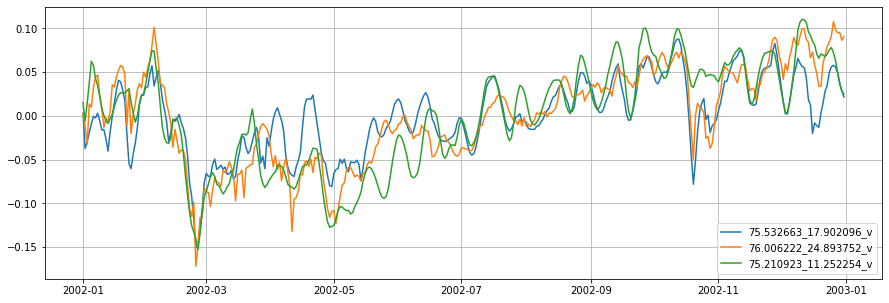

In [22]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_spitz_nemo.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%Y-%m-%d')
df_nemo['75.532663_17.902096_v']=df_nemo['75.532663_17.902096']-np.mean(df_nemo['75.532663_17.902096'])
df_nemo['76.006222_24.893752_v']=df_nemo['76.006222_24.893752']-np.mean(df_nemo['76.006222_24.893752'])
df_nemo['75.210923_11.252254_v']=df_nemo['75.210923_11.252254']-np.mean(df_nemo['75.210923_11.252254'])

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(df_nemo['dates'], df_nemo['75.532663_17.902096_v'], label='75.532663_17.902096_v')
plt.plot(df_nemo['dates'], df_nemo['76.006222_24.893752_v'], label='76.006222_24.893752_v')
plt.plot(df_nemo['dates'], df_nemo['75.210923_11.252254_v'], label='75.210923_11.252254_v')
plt.legend()
plt.grid()
plt.show()

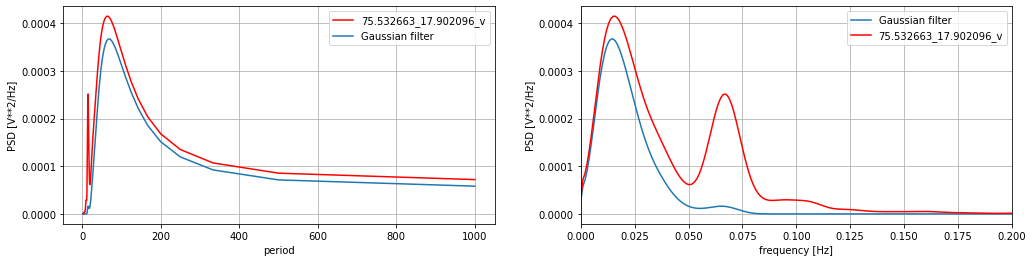

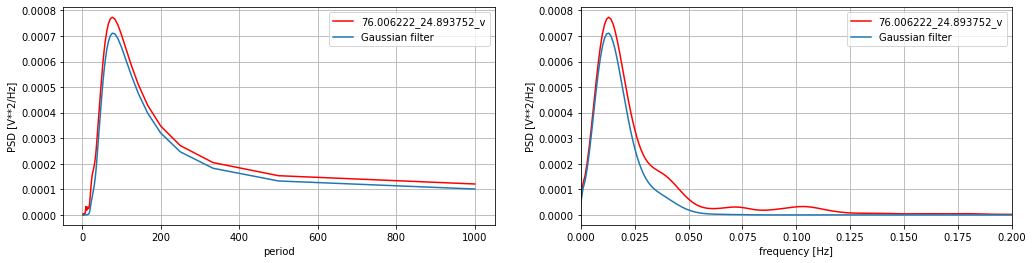

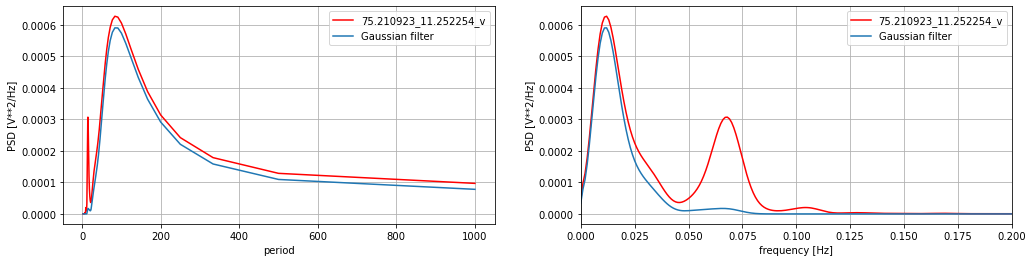

In [23]:
plt.rcParams['figure.figsize'] = [17, 4]
windows_size=14
gauss_sd=5
window = signal.gaussian(windows_size, gauss_sd)

output_gauss=signal.convolve(df_nemo['75.532663_17.902096_v'], window/window.sum(), mode='same')
f, Pxx_den = signal.welch(output_gauss, fs=1, scaling='spectrum', nfft = 1000, nperseg=100)
b_f, b_Pxx_den = signal.welch(df_nemo['75.532663_17.902096_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.plot(1/f, Pxx_den, label='Gaussian filter')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(f, Pxx_den, label='Gaussian filter' )
plt.plot(b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
df_nemo['75.532663_17.902096_v']=output_gauss

##########################################
output_gauss=signal.convolve(df_nemo['76.006222_24.893752_v'], window/window.sum(), mode='same')
f, Pxx_den = signal.welch(output_gauss, fs=1, scaling='spectrum', nfft = 1000, nperseg=100)
b_f, b_Pxx_den = signal.welch(df_nemo['76.006222_24.893752_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.plot(1/f, Pxx_den, label='Gaussian filter')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.plot(f, Pxx_den, label='Gaussian filter' )
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
df_nemo['76.006222_24.893752_v']=output_gauss

##########################################
output_gauss=signal.convolve(df_nemo['75.210923_11.252254_v'], window/window.sum(), mode='same')
f, Pxx_den = signal.welch(output_gauss, fs=1, scaling='spectrum', nfft = 1000, nperseg=100)
b_f, b_Pxx_den = signal.welch(df_nemo['75.210923_11.252254_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.plot(1/f, Pxx_den, label='Gaussian filter')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.plot(f, Pxx_den, label='Gaussian filter' )
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
df_nemo['75.210923_11.252254_v']=output_gauss

***Вот NEMO выглядит привычно. Ярко выраженная 14-дневная периодичность, неразмазанный пик на 70-80 днях***

Но так как данные реанализа мы считаем эталонными, сглаживаем 14 дней 

## Раскладываем временные ряды NEMO на составляющие

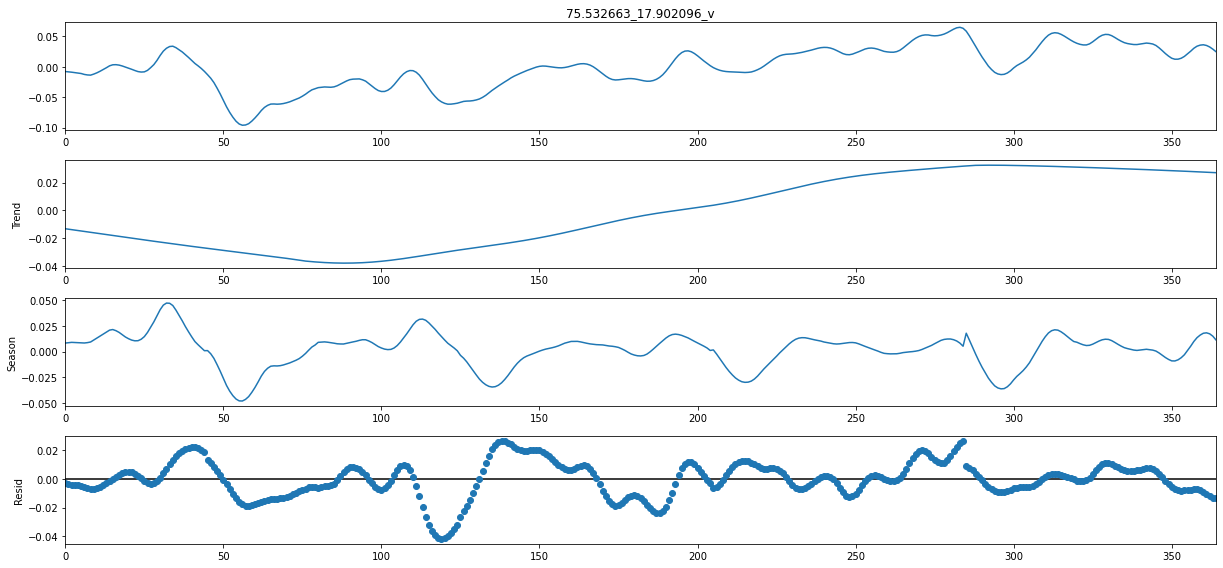

In [24]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_nemo['75.532663_17.902096_v'], period=80)
res = stl.fit()
fig = res.plot()

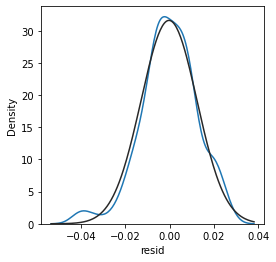

KstestResult(statistic=0.05500371961537298, pvalue=0.21152685356485945)


In [25]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)

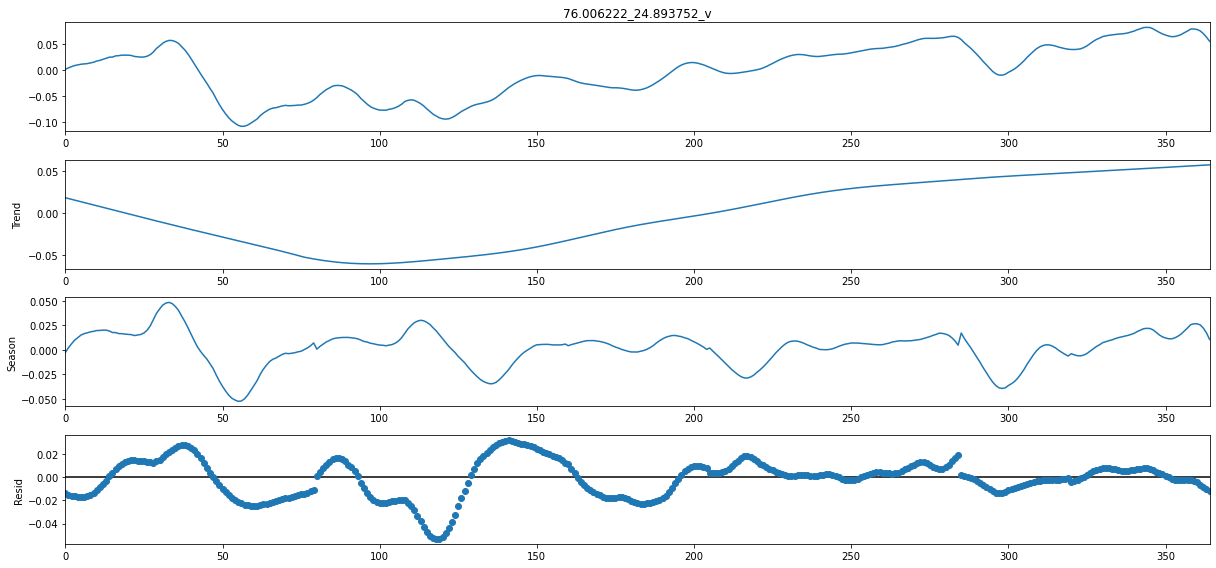

In [26]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_nemo['76.006222_24.893752_v'], period=80)
res = stl.fit()
fig = res.plot()

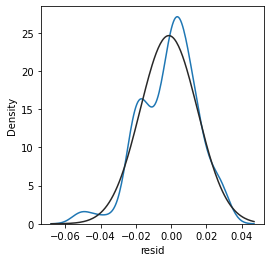

KstestResult(statistic=0.08065457099601364, pvalue=0.01635094478568505)


In [27]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)

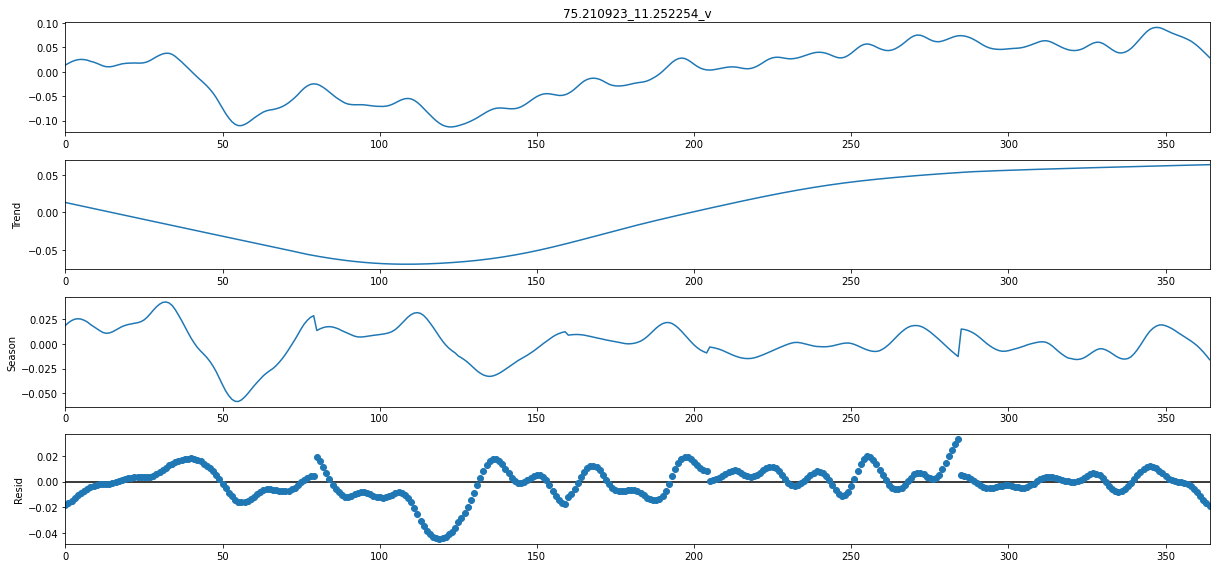

In [28]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_nemo['75.210923_11.252254_v'], period=80)
res = stl.fit()
fig = res.plot()

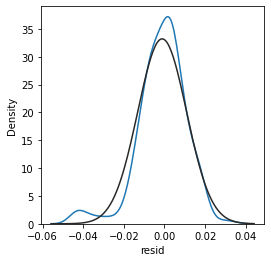

KstestResult(statistic=0.06556222295383099, pvalue=0.08294317568175458)


In [29]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)

## Считаем корреляции между реанализом и сглаженными данными NEMO 

In [30]:
import scipy.stats

In [31]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_spitz_reanalysis.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')
df_rean['75.532663_17.902096_v']=df_rean['75.532663_17.902096']-np.mean(df_rean['75.532663_17.902096'])
df_rean['76.006222_24.893752_v']=df_rean['76.006222_24.893752']-np.mean(df_rean['76.006222_24.893752'])
df_rean['75.210923_11.252254_v']=df_rean['75.210923_11.252254']-np.mean(df_rean['75.210923_11.252254'])

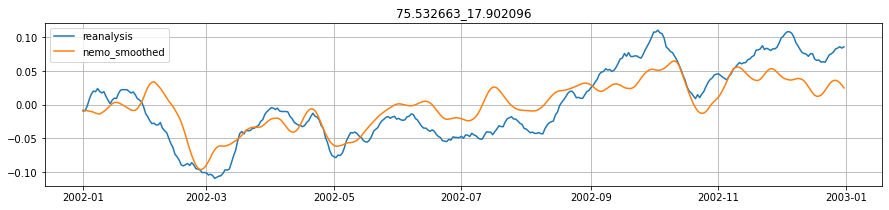

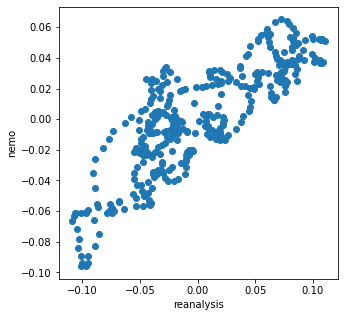

(0.8376644579470999, 2.251658533532625e-97)
SpearmanrResult(correlation=0.819009579936456, pvalue=1.3563002859259656e-89)
KendalltauResult(correlation=0.6245558261080891, pvalue=6.12749231826432e-71)


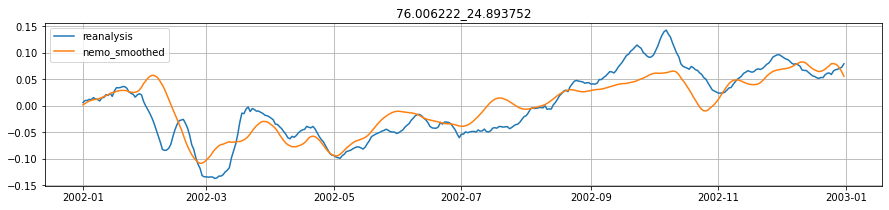

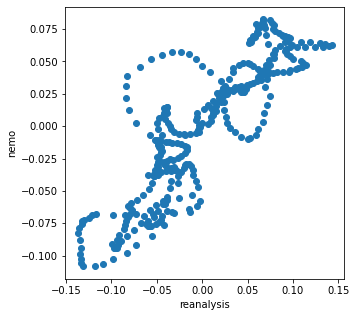

(0.8564252373857251, 2.905380141822103e-106)
SpearmanrResult(correlation=0.8577408715337118, pvalue=6.205166463505473e-107)
KendalltauResult(correlation=0.6832603312259892, pvalue=1.5747310071158798e-84)


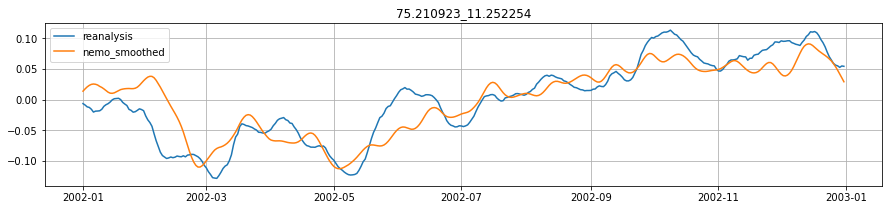

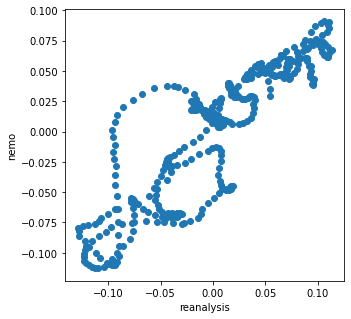

(0.8758692224381925, 6.37201959418733e-117)
SpearmanrResult(correlation=0.8946227656566758, pvalue=4.66309531001835e-129)
KendalltauResult(correlation=0.7125391630237562, pvalue=8.937909271030778e-92)


In [44]:
x=df_rean['75.532663_17.902096_v']
y=df_nemo['75.532663_17.902096_v']

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(df_rean['dates'], x, label='reanalysis')
plt.plot(df_nemo['dates'], y, label='nemo_smoothed')
plt.title('75.532663_17.902096')
plt.legend()
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(x, y)
plt.xlabel('reanalysis')
plt.ylabel('nemo')
plt.show()
print(scipy.stats.pearsonr(x, y))    # Pearson's r
print(scipy.stats.spearmanr(x, y))   # Spearman's rho
print(scipy.stats.kendalltau(x, y))  # Kendall's tau

x=df_rean['76.006222_24.893752_v']
y=df_nemo['76.006222_24.893752_v']

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(df_rean['dates'], x, label='reanalysis')
plt.plot(df_nemo['dates'], y, label='nemo_smoothed')
plt.title('76.006222_24.893752')
plt.legend()
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(x, y)
plt.xlabel('reanalysis')
plt.ylabel('nemo')
plt.show()
print(scipy.stats.pearsonr(x, y))    # Pearson's r
print(scipy.stats.spearmanr(x, y))   # Spearman's rho
print(scipy.stats.kendalltau(x, y))  # Kendall's tau

x=df_rean['75.210923_11.252254_v']
y=df_nemo['75.210923_11.252254_v']

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(df_rean['dates'], x, label='reanalysis')
plt.plot(df_nemo['dates'], y, label='nemo_smoothed')
plt.title('75.210923_11.252254')
plt.legend()
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(x, y)
plt.xlabel('reanalysis')
plt.ylabel('nemo')
plt.show()
print(scipy.stats.pearsonr(x, y))    # Pearson's r
print(scipy.stats.spearmanr(x, y))   # Spearman's rho
print(scipy.stats.kendalltau(x, y))  # Kendall's tau



***Корреляция положительная, но не сильная, а вообще графики созависимости выглядят странно***

***Еще кажется, что такое сильное расхождение как раз из-за различия в тренде, сравним и проверим:***

> Тренд плавает +-4см, незначительно, можно использовать

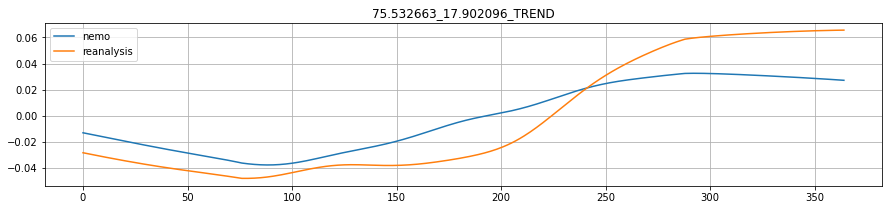

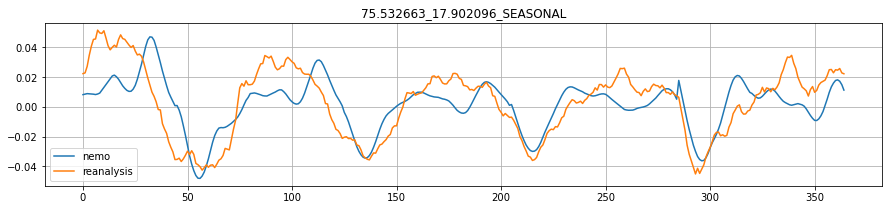

In [38]:
stl_n = STL(df_nemo['75.532663_17.902096_v'], period=80)
res_n = stl_n.fit()
stl_r = STL(df_rean['75.532663_17.902096_v'], period=80)
res_r = stl_r.fit()

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(res_n.trend, label='nemo')
plt.plot(res_r.trend, label='reanalysis')
plt.legend()
plt.title('75.532663_17.902096_TREND')
plt.grid()
plt.show()

plt.plot(res_n.seasonal, label='nemo')
plt.plot(res_r.seasonal, label='reanalysis')
plt.legend()
plt.title('75.532663_17.902096_SEASONAL')
plt.grid()
plt.show()

df_nemo['75.532663_17.902096_no_res']=df_nemo['75.532663_17.902096_v']-res_n.resid
df_rean['75.532663_17.902096_no_res']=df_rean['75.532663_17.902096_v']-res_r.resid

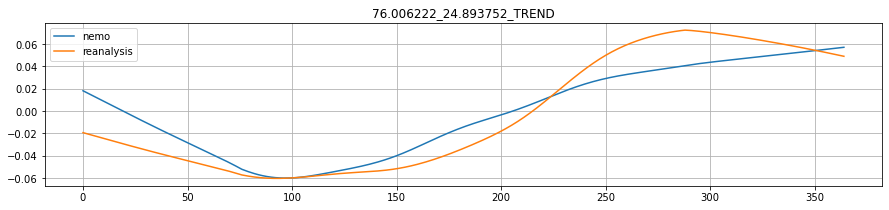

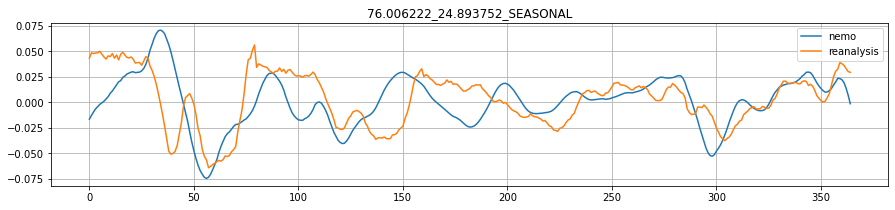

In [39]:
stl_n = STL(df_nemo['76.006222_24.893752_v'], period=80)
res_n = stl_n.fit()
stl_r = STL(df_rean['76.006222_24.893752_v'], period=80)
res_r = stl_r.fit()

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(res_n.trend, label='nemo')
plt.plot(res_r.trend, label='reanalysis')
plt.legend()
plt.title('76.006222_24.893752_TREND')
plt.grid()
plt.show()

plt.plot(res_n.seasonal+res_n.resid, label='nemo')
plt.plot(res_r.seasonal, label='reanalysis')
plt.legend()
plt.title('76.006222_24.893752_SEASONAL')
plt.grid()
plt.show()

df_nemo['76.006222_24.893752_no_res']=df_nemo['76.006222_24.893752_v']
df_rean['76.006222_24.893752_no_res']=df_rean['76.006222_24.893752_v']-res_r.resid

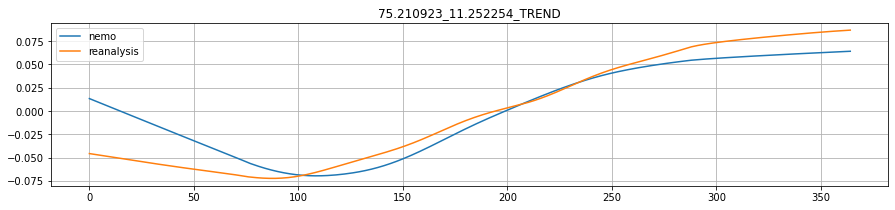

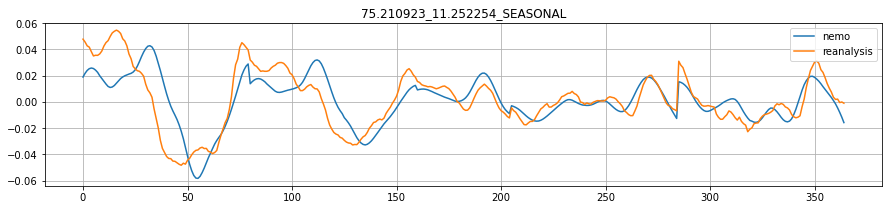

In [40]:
stl_n = STL(df_nemo['75.210923_11.252254_v'], period=80)
res_n = stl_n.fit()
stl_r = STL(df_rean['75.210923_11.252254_v'], period=80)
res_r = stl_r.fit()

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(res_n.trend, label='nemo')
plt.plot(res_r.trend, label='reanalysis')
plt.legend()
plt.title('75.210923_11.252254_TREND')
plt.grid()
plt.show()

plt.plot(res_n.seasonal, label='nemo')
plt.plot(res_r.seasonal, label='reanalysis')
plt.legend()
plt.title('75.210923_11.252254_SEASONAL')
plt.grid()
plt.show()

df_nemo['75.210923_11.252254_no_res']=df_nemo['75.210923_11.252254_v']-res_n.resid
df_rean['75.210923_11.252254_no_res']=df_rean['75.210923_11.252254_v']-res_r.resid

# красиво то как для этой точки

### Таким образом, для всего реанализа остатки незначимые, отбрасываем их. Для NEMO остатки значимые только для точки 76.006222_24.893752. (При уровне значимости критерия Колмагорова-Смирнова 0.07)

In [41]:
df_nemo

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v,75.532663_17.902096_no_res,76.006222_24.893752_no_res,75.210923_11.252254_no_res
0,-0.866979,-0.890416,-0.945982,2002-01-01,-0.007683,0.001623,0.013632,-0.004900,0.001623,0.032231
1,-0.907407,-0.904165,-0.967084,2002-01-02,-0.008211,0.004369,0.017305,-0.004917,0.004369,0.034171
2,-0.899823,-0.924889,-0.946681,2002-01-03,-0.008777,0.006813,0.020590,-0.004879,0.006813,0.035434
3,-0.888992,-0.878961,-0.923555,2002-01-04,-0.009505,0.008931,0.023080,-0.005331,0.008931,0.035883
4,-0.879334,-0.882886,-0.898750,2002-01-05,-0.010061,0.010155,0.024726,-0.005757,0.010155,0.035479
...,...,...,...,...,...,...,...,...,...,...
360,-0.814204,-0.794452,-0.897989,2002-12-27,0.036341,0.078429,0.053615,0.045339,0.078429,0.062060
361,-0.820932,-0.797816,-0.911585,2002-12-28,0.035215,0.075727,0.047854,0.045642,0.075727,0.059087
362,-0.833964,-0.797317,-0.923432,2002-12-29,0.032755,0.070515,0.041716,0.044594,0.070515,0.055783
363,-0.841198,-0.806413,-0.933277,2002-12-30,0.029161,0.063727,0.035408,0.042185,0.063727,0.052202


In [42]:
df_rean

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v,75.532663_17.902096_no_res,76.006222_24.893752_no_res,75.210923_11.252254_no_res
0,-0.3240,-0.2591,-0.3683,2002-01-01,-0.009006,0.006095,-0.006708,-0.006101,0.024075,0.002137
1,-0.3240,-0.2552,-0.3706,2002-01-02,-0.009006,0.009995,-0.009008,-0.005948,0.028831,-0.000416
2,-0.3170,-0.2552,-0.3736,2002-01-03,-0.002006,0.009995,-0.012008,-0.001860,0.027577,-0.003640
3,-0.3071,-0.2532,-0.3745,2002-01-04,0.007894,0.011995,-0.012908,0.005262,0.027646,-0.004998
4,-0.2990,-0.2535,-0.3775,2002-01-05,0.015994,0.011695,-0.015908,0.011051,0.027291,-0.008809
...,...,...,...,...,...,...,...,...,...,...
360,-0.2323,-0.1972,-0.3055,2002-12-27,0.082694,0.067995,0.056092,0.090521,0.088572,0.087963
361,-0.2309,-0.1965,-0.3066,2002-12-28,0.084094,0.068695,0.054992,0.090273,0.086515,0.088339
362,-0.2289,-0.1947,-0.3091,2002-12-29,0.086094,0.070495,0.052492,0.091395,0.082937,0.085856
363,-0.2309,-0.1925,-0.3068,2002-12-30,0.084094,0.072695,0.054792,0.088485,0.079703,0.086440


## Добавим к модели ARIMA модифицированные ряды NEMO в качестве экзогенного фактора

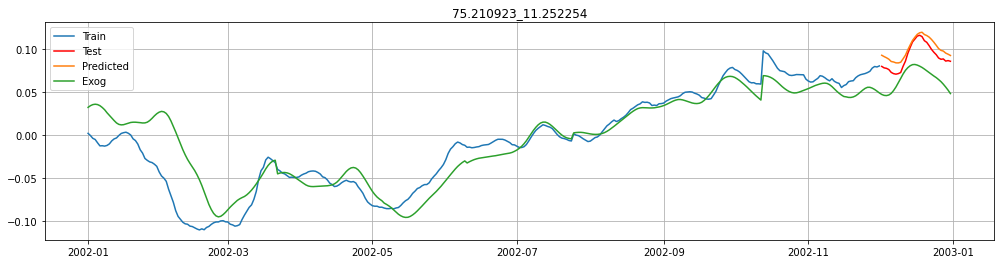

MSE =  9.081155838932261e-05
MAE =  0.008760148033015332
MAPE =  10.385
R^2 =  0.564082044199934


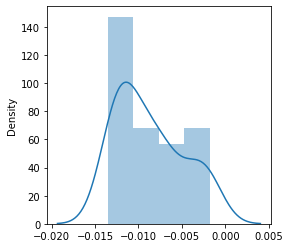

In [64]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

test = df_rean['75.210923_11.252254_no_res'][-30:]
test.index = df_rean['dates'][-30:]
train = df_rean['75.210923_11.252254_no_res'][:-30]
train.index = df_rean['dates'][:-30]
exog_train=df_nemo['75.210923_11.252254_no_res'][:-30]
exog_train.index = df_nemo['dates'][:-30]
exog_test=df_nemo['75.210923_11.252254_no_res'][-30:]
exog_test.index = df_nemo['dates'][-30:]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0), 'exog':exog_train})
model_res = stlf.fit()
forecasts = model_res.forecast(30, exog=exog_test)

plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(train, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.plot(df_nemo['dates'], df_nemo['75.210923_11.252254_no_res'], label='Exog')
plt.title('75.210923_11.252254')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

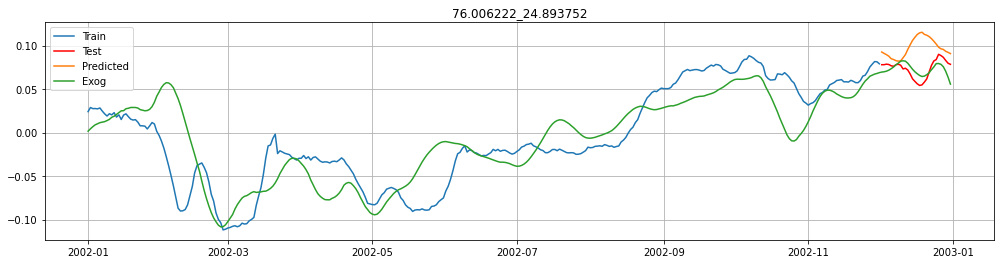

MSE =  0.0009172946075091077
MAE =  0.02375568323683252
MAPE =  36.546
R^2 =  -8.165612969941755


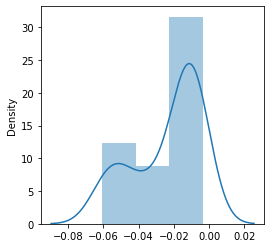

In [65]:
test = df_rean['76.006222_24.893752_no_res'][-30:]
test.index = df_rean['dates'][-30:]
train = df_rean['76.006222_24.893752_no_res'][:-30]
train.index = df_rean['dates'][:-30]
exog_train=df_nemo['76.006222_24.893752_no_res'][:-30]
exog_train.index = df_nemo['dates'][:-30]
exog_test=df_nemo['76.006222_24.893752_no_res'][-30:]
exog_test.index = df_nemo['dates'][-30:]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0), 'exog':exog_train})
model_res = stlf.fit()
forecasts = model_res.forecast(30, exog=exog_test)

plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(train, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.plot(df_nemo['dates'], df_nemo['76.006222_24.893752_no_res'], label='Exog')
plt.title('76.006222_24.893752')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

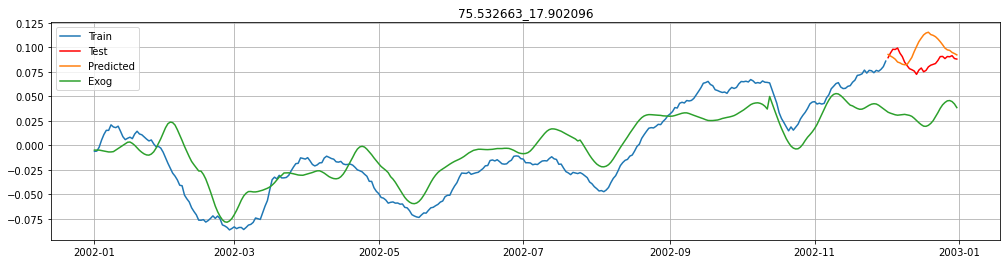

MSE =  0.00038526594685299594
MAE =  0.01575564497514362
MAPE =  19.283
R^2 =  -6.146727177481374


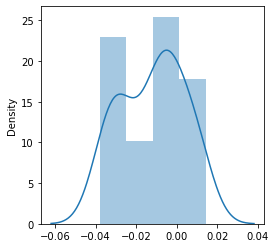

In [66]:
test = df_rean['75.532663_17.902096_no_res'][-30:]
test.index = df_rean['dates'][-30:]
train = df_rean['75.532663_17.902096_no_res'][:-30]
train.index = df_rean['dates'][:-30]
exog_train=df_nemo['75.532663_17.902096_no_res'][:-30]
exog_train.index = df_nemo['dates'][:-30]
exog_test=df_nemo['75.532663_17.902096_no_res'][-30:]
exog_test.index = df_nemo['dates'][-30:]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0), 'exog':exog_train})
model_res = stlf.fit()
forecasts = model_res.forecast(30, exog=exog_test)

plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(train, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.plot(df_nemo['dates'], df_nemo['75.532663_17.902096_no_res'], label='Exog')
plt.title('75.532663_17.902096')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

### Просто с